In [64]:
import numpy as np
import keras
from keras.layers import Dense, Conv2D, Activation
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adam, Nadam
from keras.utils import np_utils
from keras.datasets import cifar10
from sklearn.model_selection import GridSearchCV, train_test_split
from matplotlib import pyplot as plt
%matplotlib inline 
import tensorflow as tf

# Problem 1
Import the CIFAR10 dataset from Keras and plot the first 10 images
(tr_x, tr_y), (t_x, t_y) = keras.datasets.cifar10.load_data()

In [65]:
(tr_x, tr_y), (t_x, t_y) = cifar10.load_data()

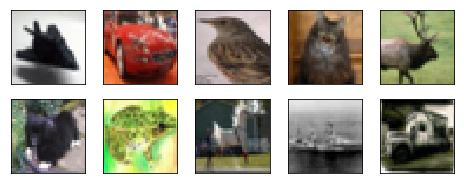

In [66]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    idx=np.where(tr_y[:]==i)[0]
    features_idx=tr_x[idx,::]
    img_num=i
    im=np.transpose(features_idx[img_num,::],(0,1,2))
    plt.imshow(im)
plt.show()

# Problem 2
Build a dense, feedforward neural network on the dataset

and test the network using the following optimizers:

 a. SGD with no momentum or decay
 
 b. SGD with non-Nesterov momentum of .9
 
 c. SGD with Nesterov momentum of .9
 
 d. RMSprop with default params
 
 e. Adagrad with default params
 
 f. Adadelta with default params
 
 g. Adam with default params
 
 h. Nadam with default params
 
Train each model for 20 epochs, tracking accuracy on test data for each model. 

For each learn_rate in [.0001, .001, .01, .1, 1], plot the test error for each network-optimizer pair (one graph per learn_rate, showing all the optimizers at that rate). 

In [67]:
def build_keras_model(optimizer):
    """Build a basic ANN in keras"""
    output_dim = 10 # number of classes
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])
    return model

def generate_optimizers(learning_rate=.01):
    """Generate a dictionary of optimizers for keras to use in gridsearch"""
    sgd = SGD() #a
    momentum = SGD(lr=learning_rate, momentum=.9) #b
    nesterov = SGD(lr=learning_rate, momentum=.9, nesterov=True) #c
    rmsprop = RMSprop(lr=learning_rate)#d
    adagrad = Adagrad(lr=learning_rate)#e
    adadelta = Adadelta(lr=learning_rate)#f
    adam = Adam(lr=learning_rate)#g
    nadam = Nadam(lr=learning_rate)#h
    optimizer_dict = {'SGD':sgd,
                      'Momentum':momentum,
                      'Nesterov':nesterov, 
                      'RMSprop':rmsprop, 
                      'AdaGrad':adagrad, 
                      'AdaDelta':adadelta, 
                      'Adam':adam,
                      'Nadam':nadam}
    return optimizer_dict

In [68]:
# Reshape y as one-hot
y_train = np_utils.to_categorical(tr_y, 10).astype(float)
y_test = np_utils.to_categorical(t_y, 10).astype(float)

# Flatten each image
input_dim = tr_x.shape[1]*tr_x.shape[2]*tr_x.shape[3]
# y_train = y_train[perm]y_train = y_train[perm]

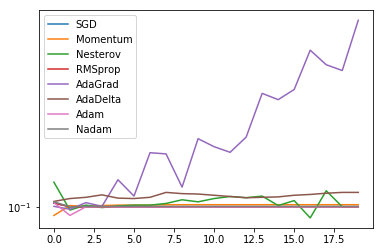

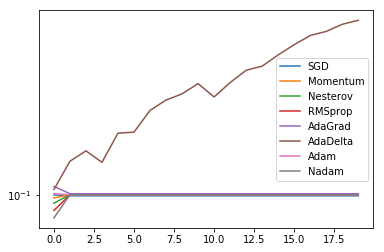

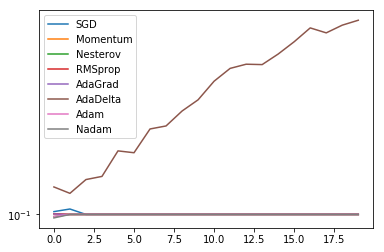

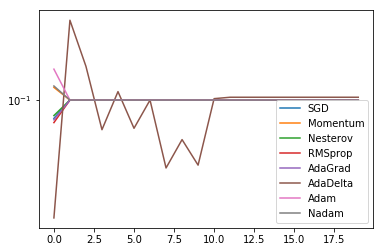

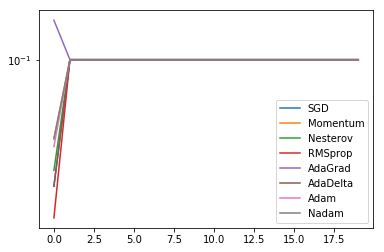

In [70]:
l= [.0001, .001, .01, .1, 1]

for i in l:
    opt = generate_optimizers(i)
    for key, value in opt.items():
        ann = build_keras_model(value)
        hist = ann.fit(x_train, y_train, batch_size=1280, epochs=20,verbose=0, shuffle=False, validation_data=(x_test, y_test))
        # Plot accuracy of each model across epochs.
        acc = hist.history['acc']
        plt.semilogy(acc, label='{}'.format(key))
    plt.legend()
    plt.show()